# parameters generated using getScalar()_ HTM Univariate

In [1]:
import numpy as np
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt 

# from tqdm import tqdm_notebook
# import time

## Load Data 1 and get Params
Load Data and Groundtruth labels:

In [2]:
PATH_relative = 'artificialWithAnomaly/art_daily_flatmiddle.csv'

In [3]:
df1 = pd.read_csv('../data/NAB/' + PATH_relative) #parse_dates=True
with open('../labels/NAB/combined_windows.json') as f:
    labels = json.loads(f.read())

In [4]:
print df1.shape
print df1.head()

(4032, 2)
             timestamp      value
0  2014-04-01 00:00:00 -21.048383
1  2014-04-01 00:05:00 -20.295477
2  2014-04-01 00:10:00 -18.127229
3  2014-04-01 00:15:00 -20.171665
4  2014-04-01 00:20:00 -21.223762


In [5]:
df1['value'] = pd.to_numeric(df1['value'])
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format="%Y-%m-%d %H:%M:%S")

Groundtruth labels for anomaly

In [6]:
labels[PATH_relative]

[[u'2014-04-10 07:15:00.000000', u'2014-04-11 16:45:00.000000']]

In [7]:
df1['labels'] = np.zeros_like(df1.value)

# set values within the range = 1
for i in range(len(labels[PATH_relative])):
    df1.loc[(df1['timestamp'] >= labels[PATH_relative][i][0]) & 
           (df1['timestamp'] <= labels[PATH_relative][i][1]), 'labels'] = 1

In [8]:
df1[0:5]

,timestamp,value,labels
0,2014-04-01 00:00:00,-21.048383,0.0
1,2014-04-01 00:05:00,-20.295477,0.0
2,2014-04-01 00:10:00,-18.127229,0.0
3,2014-04-01 00:15:00,-20.171665,0.0
4,2014-04-01 00:20:00,-21.223762,0.0


## Suggested Hyperparameters 1

In [9]:
from nupic.frameworks.opf.common_models.cluster_params import getScalarMetricWithTimeOfDayAnomalyParams

In [10]:
modelParams1 = getScalarMetricWithTimeOfDayAnomalyParams(df1['value'],
                                                        minVal=df1['value'].min(), 
                                                        maxVal=df1['value'].max()
                                                       )

In [11]:
modelParams1

{u'inferenceArgs': {u'inputPredictedField': u'auto',
  u'predictedField': u'c1',
  u'predictionSteps': [1]},
 u'modelConfig': {u'aggregationInfo': {u'days': 0,
   u'fields': [],
   u'hours': 0,
   u'microseconds': 0,
   u'milliseconds': 0,
   u'minutes': 0,
   u'months': 0,
   u'seconds': 0,
   u'weeks': 0,
   u'years': 0},
  u'model': u'HTMPrediction',
  u'modelParams': {u'anomalyParams': {u'anomalyCacheRecords': None,
    u'autoDetectThreshold': None,
    u'autoDetectWaitRecords': 5030},
   u'clEnable': False,
   u'clParams': {u'alpha': 0.035828933612158,
    u'regionName': u'SDRClassifierRegion',
    u'steps': u'1',
    u'verbosity': 0},
   u'inferenceType': u'TemporalAnomaly',
   u'sensorParams': {u'encoders': {u'c0_dayOfWeek': None,
     u'c0_timeOfDay': {u'fieldname': u'c0',
      u'name': u'c0',
      u'timeOfDay': [21, 9.49],
      u'type': u'DateEncoder'},
     u'c0_weekend': None,
     u'c1': {u'fieldname': u'c1',
      u'name': u'c1',
      'resolution': 0.84582413051000005,

## Load Data 2 and get Params
Load Data and Groundtruth labels:

In [12]:
PATH_relative = 'artificialWithAnomaly/art_daily_jumpsup_AB.csv'


In [13]:
df2 = pd.read_csv('../data/NAB/' + PATH_relative) #parse_dates=True
with open('../labels/NAB/combined_windows.json') as f:
    labels = json.loads(f.read())

In [14]:
print df1.shape
print df2.shape
print df2.head()

(4032, 3)
(4032, 2)
             timestamp      value
0  2014-04-01 00:00:00  21.519280
1  2014-04-01 00:05:00  21.707762
2  2014-04-01 00:10:00  18.097725
3  2014-04-01 00:15:00  21.954012
4  2014-04-01 00:20:00  20.840091


In [15]:
df2['value'] = pd.to_numeric(df2['value'])
df2['timestamp'] = pd.to_datetime(df2['timestamp'], format="%Y-%m-%d %H:%M:%S")

Groundtruth labels for anomaly

In [16]:
labels[PATH_relative]

[[u'2014-04-03 20:10:00.000000', u'2014-04-04 16:25:00.000000']]

In [17]:
df2['labels'] = np.zeros_like(df2.value)

# set values within the range = 1
for i in range(len(labels[PATH_relative])):
    df2.loc[(df2['timestamp'] >= labels[PATH_relative][i][0]) & 
           (df2['timestamp'] <= labels[PATH_relative][i][1]), 'labels'] = 1

In [18]:
df2[0:5]

,timestamp,value,labels
0,2014-04-01 00:00:00,21.519280,0.0
1,2014-04-01 00:05:00,21.707762,0.0
2,2014-04-01 00:10:00,18.097725,0.0
3,2014-04-01 00:15:00,21.954012,0.0
4,2014-04-01 00:20:00,20.840091,0.0


## Suggested Hyperparameters 2

In [19]:
from nupic.frameworks.opf.common_models.cluster_params import getScalarMetricWithTimeOfDayAnomalyParams

In [20]:
modelParams2 = getScalarMetricWithTimeOfDayAnomalyParams(df2['value'],
                                                        minVal=df2['value'].min(), 
                                                        maxVal=df2['value'].max()
                                                       )

In [21]:
modelParams2

{u'inferenceArgs': {u'inputPredictedField': u'auto',
  u'predictedField': u'c1',
  u'predictionSteps': [1]},
 u'modelConfig': {u'aggregationInfo': {u'days': 0,
   u'fields': [],
   u'hours': 0,
   u'microseconds': 0,
   u'milliseconds': 0,
   u'minutes': 0,
   u'months': 0,
   u'seconds': 0,
   u'weeks': 0,
   u'years': 0},
  u'model': u'HTMPrediction',
  u'modelParams': {u'anomalyParams': {u'anomalyCacheRecords': None,
    u'autoDetectThreshold': None,
    u'autoDetectWaitRecords': 5030},
   u'clEnable': False,
   u'clParams': {u'alpha': 0.035828933612158,
    u'regionName': u'SDRClassifierRegion',
    u'steps': u'1',
    u'verbosity': 0},
   u'inferenceType': u'TemporalAnomaly',
   u'sensorParams': {u'encoders': {u'c0_dayOfWeek': None,
     u'c0_timeOfDay': {u'fieldname': u'c0',
      u'name': u'c0',
      u'timeOfDay': [21, 9.49],
      u'type': u'DateEncoder'},
     u'c0_weekend': None,
     u'c1': {u'fieldname': u'c1',
      u'name': u'c1',
      'resolution': 1.1303574668846152,


## Merge DataFrames

In [22]:
df = pd.DataFrame.merge(df1, df2, how='left', on='timestamp', suffixes=('1','2'))

In [23]:
data = df.to_dict(orient='records')
data[0:5]

[{'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:00:00'),
  'value1': -21.0483826823,
  'value2': 21.519279906799998},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:05:00'),
  'value1': -20.2954768676,
  'value2': 21.7077624925},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:10:00'),
  'value1': -18.127229468299998,
  'value2': 18.0977252372},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:15:00'),
  'value1': -20.1716653997,
  'value2': 21.9540122797},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:20:00'),
  'value1': -21.223761612,
  'value2': 20.840090926}]

In [24]:
#import pandas_profiling

In [25]:
#pandas_profiling.ProfileReport(df)

**value1** and **value2** have something `corr=-0.5`

## Encoder


In [26]:
modelParams1['modelConfig']['modelParams']['sensorParams']

{u'encoders': {u'c0_dayOfWeek': None,
  u'c0_timeOfDay': {u'fieldname': u'c0',
   u'name': u'c0',
   u'timeOfDay': [21, 9.49],
   u'type': u'DateEncoder'},
  u'c0_weekend': None,
  u'c1': {u'fieldname': u'c1',
   u'name': u'c1',
   'resolution': 0.84582413051000005,
   u'seed': 42,
   u'type': u'RandomDistributedScalarEncoder'}},
 u'sensorAutoReset': None,
 u'verbosity': 0}

In [27]:
modelParams2['modelConfig']['modelParams']['sensorParams']

{u'encoders': {u'c0_dayOfWeek': None,
  u'c0_timeOfDay': {u'fieldname': u'c0',
   u'name': u'c0',
   u'timeOfDay': [21, 9.49],
   u'type': u'DateEncoder'},
  u'c0_weekend': None,
  u'c1': {u'fieldname': u'c1',
   u'name': u'c1',
   'resolution': 1.1303574668846152,
   u'seed': 42,
   u'type': u'RandomDistributedScalarEncoder'}},
 u'sensorAutoReset': None,
 u'verbosity': 0}

In [28]:
data = df.to_dict(orient='records')
data[0:5]

[{'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:00:00'),
  'value1': -21.0483826823,
  'value2': 21.519279906799998},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:05:00'),
  'value1': -20.2954768676,
  'value2': 21.7077624925},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:10:00'),
  'value1': -18.127229468299998,
  'value2': 18.0977252372},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:15:00'),
  'value1': -20.1716653997,
  'value2': 21.9540122797},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:20:00'),
  'value1': -21.223761612,
  'value2': 20.840090926}]

Check for each model the which are the econder parameters:

In [29]:
for k,v in modelParams1['modelConfig']['modelParams']['sensorParams']['encoders'].items():
    if v != None:
        print k, v, "\n"
    else: 
        print str(0), "\n" 

0 

c0_timeOfDay {u'fieldname': u'c0', u'timeOfDay': [21, 9.49], u'type': u'DateEncoder', u'name': u'c0'} 

c1 {u'name': u'c1', 'resolution': 0.84582413051000005, u'seed': 42, u'fieldname': u'c1', u'type': u'RandomDistributedScalarEncoder'} 

0 



In [30]:
for k,v in modelParams2['modelConfig']['modelParams']['sensorParams']['encoders'].items():
    if v != None:
        print k, v, "\n"
    else: 
        print str(0), "\n" 

0 

c0_timeOfDay {u'fieldname': u'c0', u'timeOfDay': [21, 9.49], u'type': u'DateEncoder', u'name': u'c0'} 

c1 {u'name': u'c1', 'resolution': 1.1303574668846152, u'seed': 42, u'fieldname': u'c1', u'type': u'RandomDistributedScalarEncoder'} 

0 



We need to build: 
- 1x 'DateEncoder' which encodes the field `timestamp`
- 1x 'ScalarEncoder' which encodes the field `value1`
- 1x 'ScalarEncoder' which encodes the field `value2`

The `values`-fields have been encoded the same way, only `resolution` change.

In [31]:
def remove_dict_key(d, keys):
    """
    Remove 'keys' in dict.
    
    Parameters
    ----------
    d: dict
    keys: list
        List containing key(s) to delete.
        
    Outputp
    -------
    new_d: dict
        A new dict object.
    
    """
    new_d = dict(d)
    for i in keys: 
        del new_d[i]
    return new_d

In [32]:
#from nupic.encoders.random_distributed_scalar import RandomDistributedScalarEncoder
from nupic.encoders.scalar import ScalarEncoder

In [33]:
v1Enc = ScalarEncoder(w=21, minval=df['value1'].min(), maxval=df['value1'].max(),
                     resolution=modelParams1['modelConfig']['modelParams']['sensorParams']['encoders']['c1']['resolution'])
v2Enc = ScalarEncoder(w=21, minval=df['value2'].min(), maxval=df['value2'].max(),
                     resolution=modelParams2['modelConfig']['modelParams']['sensorParams']['encoders']['c1']['resolution'])


print str(data[0]['value1']) + " = ", v1Enc.encode(data[0]['value1'])
print str(data[0]['value2']) + " = ", v2Enc.encode(data[0]['value2'])

-21.0483826823 =  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
21.5192799068 =  [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [34]:
enc = v1Enc.encode(-21)
#print(enc)
v1Enc.decode(enc)

({'[-21.9987888386:87.9583481277]': ([[-21.152964708090007,
     -21.152964708090007]],
   '-21.15')},
 ['[-21.9987888386:87.9583481277]'])

In [35]:
enc = v2Enc.encode(21)
#print(enc)
v2Enc.decode(enc)

({'[18.001009818:164.947480513]': ([[21.392082218653847, 21.392082218653847]],
   '21.39')},
 ['[18.001009818:164.947480513]'])

In [36]:
data = df.to_dict(orient='records')
data[0:5]

[{'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:00:00'),
  'value1': -21.0483826823,
  'value2': 21.519279906799998},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:05:00'),
  'value1': -20.2954768676,
  'value2': 21.7077624925},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:10:00'),
  'value1': -18.127229468299998,
  'value2': 18.0977252372},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:15:00'),
  'value1': -20.1716653997,
  'value2': 21.9540122797},
 {'labels1': 0.0,
  'labels2': 0.0,
  'timestamp': Timestamp('2014-04-01 00:20:00'),
  'value1': -21.223761612,
  'value2': 20.840090926}]

Both scalar encoders seems to be very precise for our data.  

In [37]:
import datetime
from nupic.encoders.date import DateEncoder

The `timestamp` field is the same for both dataframes, and have also been encoded the same way.  
So the is completely equivalent which one we decide to encode.

In [38]:
dEnc = DateEncoder(modelParams1['modelConfig']['modelParams']['sensorParams']['encoders']['c0_timeOfDay']['timeOfDay']) 

# tsObs1 = datetime.datetime.strptime(data[0]['timestamp'], "%Y-%m-%d %H:%M:%S")
# print "TimeStamp-obs0 = ", dEnc.encode(data[0]['timestamp'])
# print "TimeStamp-obs1 = ", dEnc.encode(data[1]['timestamp'])

Wrap all together.

In [39]:
obs = []
inputTs = []
inputSDRts = []
inputVal1 = []
inputSDRval1 = []
label1 = []
inputVal2 = []
inputSDRval2 = []
label2 = []
inputSDR = []  # main
inputTsIdx = [0, len(dEnc.encode(data[0]['timestamp'])) - 1]
inputVal1Idx = [len(dEnc.encode(data[0]['timestamp'])), 
                len(dEnc.encode(data[0]['timestamp'])) + len(v1Enc.encode(data[1]['value1'])) - 1]
inputVal2Idx = [inputVal1Idx[1]+1, 
                inputVal1Idx[1] + len(v2Enc.encode(data[1]['value2']))]

for i in xrange(len(data)):
    obs.append(i)
    inputTs.append(data[i]['timestamp'])  
    inputVal1.append(data[i]['value1'])   
    inputVal2.append(data[i]['value2'])   
    label1.append(data[i]['labels1'])
    label2.append(data[i]['labels2'])
    inputSDRts.append(dEnc.encode(data[i]['timestamp']))
    inputSDRval1.append(v1Enc.encode(data[i]['value1']))
    inputSDRval2.append(v2Enc.encode(data[i]['value2']))
    inputSDR.append(np.hstack((inputSDRts[i], inputSDRval1[i], inputSDRval2[i])))  # combine the 3 encoders
    
# send everything to dict    
data = pd.DataFrame({'inputTs':inputTs, 'inputVal1':inputVal1, 'inputVal2':inputVal2,
                     'label1': label1, 'label2': label2, 'inputSDR':inputSDR, 
                     'inputSDRval1':inputSDRval1, 'inputSDRval2':inputSDRval2, 'inputSDRts':inputSDRts, 
                    }, index=obs).to_dict(orient='records')

In [40]:
inputTsIdx, inputVal1Idx, inputVal2Idx

([0, 809], [810, 960], [961, 1111])

In [41]:
print len(inputSDRts[0])
print len(inputSDRval1[0])

810
151


In [42]:
print "len(inputSDR): ", len(data[0]['inputSDR'])
#print data[0]
print "Observations: ", len(data)

len(inputSDR):  1112
Observations:  4032


# Spatial Pooler
[link to wiki](http://nupic.docs.numenta.org/1.0.3/api/algorithms/spatial-pooling.html#nupic.algorithms.spatial_pooler.SpatialPooler)

Load `modelParams` fors SP:

In [43]:
from nupic.algorithms.spatial_pooler import SpatialPooler

In [44]:
print "### modelParams1"
print modelParams1['modelConfig']['modelParams']['spParams']
print "\n ### modelParams2"
print modelParams2['modelConfig']['modelParams']['spParams']

### modelParams1
{u'columnCount': 2048, u'synPermInactiveDec': 0.0005, u'spatialImp': u'cpp', u'inputWidth': 0, u'spVerbosity': 0, u'synPermConnected': 0.2, u'synPermActiveInc': 0.003, u'potentialPct': 0.8, u'numActiveColumnsPerInhArea': 40, u'boostStrength': 0.0, u'globalInhibition': 1, u'seed': 1956}

 ### modelParams2
{u'columnCount': 2048, u'synPermInactiveDec': 0.0005, u'spatialImp': u'cpp', u'inputWidth': 0, u'spVerbosity': 0, u'synPermConnected': 0.2, u'synPermActiveInc': 0.003, u'potentialPct': 0.8, u'numActiveColumnsPerInhArea': 40, u'boostStrength': 0.0, u'globalInhibition': 1, u'seed': 1956}


same same

In [45]:
selectedSPparams = {
    u'boostStrength': 0.0,
#     u'columnCount': 2048,
    u'globalInhibition': 1,
#     u'inputWidth': 0,
    u'numActiveColumnsPerInhArea': 40,
    u'potentialPct': 0.8,
    u'seed': 1956,
    u'spVerbosity': 0,
#     u'spatialImp': u'cpp',
    u'synPermActiveInc': 0.003,
    u'synPermConnected': 0.2,
    u'synPermInactiveDec': 0.0005,
   ### Changes
    u'inputDimensions': (len(data[0]['inputSDR']), ),
    u'columnDimensions': modelParams1['modelConfig']['modelParams']['spParams']['columnCount'], 
}

In [46]:
# Init SP
sp = SpatialPooler(**selectedSPparams)

In [47]:
# Print SP
cols = []
connections = []

for col in xrange(sp.getColumnDimensions()):
    connected = np.zeros(len(data[0]['inputSDR']), dtype="int")
    sp.getConnectedSynapses(col, connected)
    cols.append(col)
    connections.append(connected)

spSDR = dict(zip(cols, connections))

In [48]:
print "SP Shape:" + str(len(spSDR)) + "; " + str(len(spSDR[0]))

SP Shape:2048; 1112


The active bits (min-columns) are set by calculating the *overlapping score* with the input vector.  
*Overalpping score* = `inputSDR` * `spSDR\[column]`

In [49]:
def idx_active_cols(inputArr):
    """
    This function takes an 1d or nd-array and returns a 1d-array with the index for ACTIVE bits/columns: 
    
    Parameters
    ----------
    inputArr:   np.array (1d or nD)
            
    Output
    ------
    tmActiveColsIdx: 1d np.arraz
        Array with index of active cols.
        
    """
    #tmObject.reshape(tmObject.numberOfCols, tm.cellsPerColumn)
    activeColsVec = []  # initialize vector

    for i in range(inputArr.shape[0]):
        # assign 1 if any 1 (active cell) in the column,
        # 0 otherwise
        if np.any(inputArr[i]>0):
        # if np.any(tm.compute(spSDR[track[3]['sp_active']], enableLearn=True, enableInference=True).reshape(256, 3)[i]>0):
            activeColsVec.append(1)
        else:
            activeColsVec.append(0)
    # return index of active Columns        
    tmActiveColsIdx = np.flatnonzero(np.array(activeColsVec))
    return tmActiveColsIdx

`Compute` returns the to 40 active cols, as defined in:  
`MODEL_PARAMS['modelParams']['spParams']['numActiveColumnsPerInhArea']=40`.

In [50]:
# Save all the SP-columns active for every input

for i in xrange(len(data)):
    output = np.zeros(sp.getColumnDimensions(), dtype="int")
    sp.compute(data[i]['inputSDR'], learn=False, activeArray=output)
    data[i]['sp_active'] = idx_active_cols(output) #save to dict
    
#     print "obs" + str(i) + ", Active col: ", str(output)

In [51]:
data[0]['sp_active']

array([ 358,  359,  366,  369,  371,  372,  375,  376,  378,  379,  384,
       1497, 1498, 1502, 1506, 1510, 1513, 1518, 1519, 1524, 1525, 1764,
       1769, 1773, 1775, 1776, 1779, 1780, 1786, 1788, 1789, 1792, 1794,
       1796, 1797, 1800, 1801, 1805, 1814, 1821])

In [52]:
data[0].keys()

['inputSDR',
 'inputSDRts',
 'inputVal2',
 'inputVal1',
 'inputTs',
 'label1',
 'sp_active',
 'inputSDRval2',
 'label2',
 'inputSDRval1']

In [53]:
for _ in xrange(5):
    print "obs" + str(_)
    print "Active col: ", data[_]['sp_active']

obs0
Active col:  [ 358  359  366  369  371  372  375  376  378  379  384 1497 1498 1502 1506
 1510 1513 1518 1519 1524 1525 1764 1769 1773 1775 1776 1779 1780 1786 1788
 1789 1792 1794 1796 1797 1800 1801 1805 1814 1821]
obs1
Active col:  [ 358  359  366  369  371  372  375  376  378  379  384 1497 1498 1502 1503
 1510 1513 1519 1524 1525 1538 1764 1769 1773 1775 1776 1779 1780 1786 1788
 1789 1792 1794 1796 1797 1800 1801 1805 1814 1821]
obs2
Active col:  [ 358  359  366  369  371  372  375  376  378  379  384 1513 1516 1524 1525
 1528 1530 1533 1538 1764 1769 1771 1773 1775 1776 1777 1779 1780 1781 1782
 1786 1788 1789 1790 1792 1794 1797 1799 1800 1801]
obs3
Active col:  [ 358  359  366  369  371  372  375  376  378  379  384 1497 1498 1502 1503
 1510 1513 1519 1524 1525 1538 1764 1769 1773 1775 1776 1779 1780 1786 1788
 1789 1792 1794 1796 1797 1800 1801 1805 1814 1821]
obs4
Active col:  [ 358  359  366  369  371  372  375  376  378  379  384 1497 1498 1502 1506
 1510 1513 1518 15

In [54]:
# Permanence
# permanence = []

# for i in xrange(sp.getColumnDimensions()):
#     p = []
#     sp.getPermanence(i, p)
#     permanence.append(np.array(p))

# permanence[0]

For `Permanence > Threshold` we have a connection to the *inputSDR*.

Summarizing SP:

In [55]:
entry = 0

print "inputSDR: ", data[entry]['inputSDR']
print "SDR active bits", idx_active_cols(data[entry]['inputSDR'])
print "SP active col: ", data[entry]['sp_active']
print "\n", "------------"

for i in data[entry]['sp_active']:
    print "SP active col: " + str(i) + "; \tOverlappin bits: " + str(sum(spSDR[i] * data[entry]['inputSDR']))

#print "Pemanence winning col: ", permanence[track[0]['sp_active']]

inputSDR:  [0 0 0 ..., 0 0 0]
SDR active bits [189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825
 826 827 828 829 830 831 964 965 966 967 968 969 970 971 972 973 974 975
 976 977 978 979 980 981 982 983 984]
SP active col:  [ 358  359  366  369  371  372  375  376  378  379  384 1497 1498 1502 1506
 1510 1513 1518 1519 1524 1525 1764 1769 1773 1775 1776 1779 1780 1786 1788
 1789 1792 1794 1796 1797 1800 1801 1805 1814 1821]

------------
SP active col: 358; 	Overlappin bits: 10
SP active col: 359; 	Overlappin bits: 11
SP active col: 366; 	Overlappin bits: 10
SP active col: 369; 	Overlappin bits: 13
SP active col: 371; 	Overlappin bits: 11
SP active col: 372; 	Overlappin bits: 10
SP active col: 375; 	Overlappin bits: 10
SP active col: 376; 	Overlappin bits: 10
SP active col: 378; 	Overlappin bits: 12
SP active col: 379; 	Overlappin bits: 11
SP active col: 384; 	Overlappin bits: 10
SP active co

# Temporal Pooler

[link to wiki](http://nupic.docs.numenta.org/1.0.3/api/algorithms/sequence-memory.html#nupic.algorithms.backtracking_tm_cpp.BacktrackingTMCPP)

Load `MODEL_PARAMS` fors TM:

In [56]:
print "### modelParams1"
print modelParams1['modelConfig']['modelParams']['tmParams']
print "\n ### modelParams2"
print modelParams2['modelConfig']['modelParams']['tmParams']

### modelParams1
{u'columnCount': 2048, u'activationThreshold': 13, u'pamLength': 3, u'cellsPerColumn': 32, u'permanenceDec': 0.1, u'minThreshold': 10, u'inputWidth': 2048, u'maxSynapsesPerSegment': 32, u'outputType': u'normal', u'initialPerm': 0.21, u'globalDecay': 0.0, u'maxAge': 0, u'newSynapseCount': 20, u'maxSegmentsPerCell': 128, u'permanenceInc': 0.1, u'temporalImp': u'cpp', u'seed': 1960, u'verbosity': 0}

 ### modelParams2
{u'columnCount': 2048, u'activationThreshold': 13, u'pamLength': 3, u'cellsPerColumn': 32, u'permanenceDec': 0.1, u'minThreshold': 10, u'inputWidth': 2048, u'maxSynapsesPerSegment': 32, u'outputType': u'normal', u'initialPerm': 0.21, u'globalDecay': 0.0, u'maxAge': 0, u'newSynapseCount': 20, u'maxSegmentsPerCell': 128, u'permanenceInc': 0.1, u'temporalImp': u'cpp', u'seed': 1960, u'verbosity': 0}


same same

In [57]:
selectedTMparams = { 
    'activationThreshold': 20,
    'cellsPerColumn': 32,
#     'columnCount': 2048,
    'globalDecay': 0.0,
    'initialPerm': 0.24,
#     'inputWidth': 2048,
    'maxAge': 0,
    'maxSegmentsPerCell': 128,
    'maxSynapsesPerSegment': 128,
    'minThreshold': 13,
    'newSynapseCount': 31,
    'outputType': 'normal',
    'permanenceDec': 0.008,
    'permanenceInc': 0.04,
#     'predictedSegmentDecrement': 0.001,
    'seed': 1960,
#     'temporalImp': 'tm_cpp',
    'verbosity': 0,
    ### Changes
    'numberOfCols': modelParams1['modelConfig']['modelParams']['tmParams']['columnCount'],

}

To better understand the example we suggest to set `verbosity=5`

In [58]:
from nupic.algorithms.backtracking_tm import BacktrackingTM

In [59]:
# init TM
tm = BacktrackingTM(**selectedTMparams)

For every input, send the ACTIVE_sp_columns to TM as 0/1 vector

In [60]:
for i in xrange(len(data)): #len(data)
    # for every input, select the 'sp_active' col and get active bit in very col  
     sp4tm = [spSDR.get(sp) for sp in data[i]['sp_active']]
    # stack all the arrays in matrix and sum to see overlap 
     sp4tm = sum(np.array(sp4tm))
    # if overlap 1 send active cols aove 
     sp4tm[sp4tm>0] = 1
    
    # send the vector with the SP active cols to TM
     data[i]['sp4tm'] = sp4tm

In [61]:
# Step 3: send the  input to the temporal memory for learning

# # Send each input in the sequence in order
# for i in xrange(len(data[:1000])):

#     # The compute method performs one step of learning and/or inference. Note:
#     # here we just perform learning but you can perform prediction/inference and
#     # learning in the same step if you want (online learning).
#     tm_output = tm.compute(data[i]['sp4tm'], enableLearn=True, enableInference=True)
#     # This function prints the segments associated with every cell.$$$$
#     # If you really want to understand the TP, uncomment this line. By following
#     # every step you can get an excellent understanding for exactly how the TP
#     # learns.
#     #tm.printCells()

Use the first 3000 entries to learn, test on the rest:

## Anomaly Score

[link](http://nupic.docs.numenta.org/stable/guides/anomaly-detection.html)

The algorithm for the anomaly score is as follows:  

AS = |A_(t) - (P_(t-1) cross A_(t))|  / |A_(t)|  

A_(t):   Predicted columns at time t  
P_(t-1): Active columns at time t

**Note**: Here, a “predicted column” is a column with a non-zero confidence value. This is not exactly the same as having a cell in the predicted state. For more information, refer the “predicted cells vs. confidences” section below.  

...to compute the confidences for a cell, the Temporal Pooler uses the soft match count (the number of active synapses, regardless of the permanence values). Therefore, the set of columns with non-zero confidences will always be a superset of the columns containing predicted cells.

In [62]:
def computeRawAnomalyScore(activeColumns, prevPredictedColumns):
  """Computes the raw anomaly score.

  The raw anomaly score is the fraction of active columns not predicted.

  :param activeColumns: array of active column indices
  :param prevPredictedColumns: array of columns indices predicted in prev step
  :returns: anomcaly score 0..1 (float)
  """
  nActiveColumns = len(activeColumns)
  if nActiveColumns > 0:
    # Test whether each element of a 1-D array is also present in a second
    # array. Sum to get the total # of columns that are active and were
    # predicted.
    score = np.in1d(activeColumns, prevPredictedColumns).sum()
    # Get the percent of active columns that were NOT predicted, that is
    # our anomaly score.
    score = (nActiveColumns - score) / float(nActiveColumns)
  else:
    # There are no active columns.
    score = 0.0

  return score

In [63]:
# Utility routine for printing the input vector
def formatRow(x):
    s = ''
    for c in range(len(x)):
        if c > 0 and c % 10 == 0:
            s += ' '
        s += str(x[c])
    s += ' '
    return s

## Anomaly Likelihood

``` 
from nupic.algorithms.anomaly_likelihood import AnomalyLikelihood

class AnomalyLikelihood(claLearningPeriod=None,
                       learningPeriod=288,
                       estimationSamples=100,
                       historicWindowSize=8640,
                       reestimationPeriod=100)):

    NOTE: Anomaly likelihood scores are reported at a flat 0.5 for
    learningPeriod + estimationSamples iterations.

    claLearningPeriod and learningPeriod are specifying the same variable,
    although claLearningPeriod is a deprecated name for it.

    :param learningPeriod: (claLearningPeriod: deprecated) - (int) the number of
      iterations required for the algorithm to learn the basic patterns in the
      dataset and for the anomaly score to 'settle down'. The default is based
      on empirical observations but in reality this could be larger for more
      complex domains. The downside if this is too large is that real anomalies
      might get ignored and not flagged.

    :param estimationSamples: (int) the number of reasonable anomaly scores
      required for the initial estimate of the Gaussian. The default of 100
      records is reasonable - we just need sufficient samples to get a decent
      estimate for the Gaussian. It's unlikely you will need to tune this since
      the Gaussian is re-estimated every 10 iterations by default.

    :param historicWindowSize: (int) size of sliding window of historical
      data points to maintain for periodic reestimation of the Gaussian. Note:
      the default of 8640 is based on a month's worth of history at 5-minute
      intervals.

    :param reestimationPeriod: (int) how often we re-estimate the Gaussian
      distribution. The ideal is to re-estimate every iteration but this is a
      performance hit. In general the system is not very sensitive to this
      number as long as it is small relative to the total number of records
      processed.
    ```

In [64]:
from nupic.algorithms.anomaly_likelihood import AnomalyLikelihood

In [65]:
anomalyLikelihood = AnomalyLikelihood()

# for i in xrange(100):  # len(data)
#     # Compute the Anomaly Likelihood
#     likelihood = anomalyLikelihood.anomalyProbability(data[i]['inputVal'], data[i]['AnomalyScore'], data[i]['inputTs'])
#     #likelihood = anomalyLikelihood.anomalyProbability(inputData["value"], anomalyScore, inputData["dttm"])
#     logLikelihood = anomalyLikelihood.computeLogLikelihood(likelihood)
#     data[i]['lh'] = likelihood    
#     data[i]['logLH'] = likelihood
#     #if likelihood > 0.9999:
#         #print "Anomaly detected:", track[i]['inputVal'], track[i]['inputTs'], likelihood

## Run Experiment

In [66]:
# Step 4: send the same sequence of vectors and look at predictions made by
# temporal memory


for i in xrange(len(data)):  # len(data) 
#     print "\n\n--------" + str(i) + "-----------"
#     print "Raw input vector\n",formatRow(track[i]['sp4tm'])

    # Send each vector to the TP, with learning turned off
    tm.compute(data[i]['sp4tm'], enableLearn=True, enableInference=True)

    # This method prints out the active state of each cell followed by the
    # predicted state of each cell. For convenience the cells are grouped
    # 10 at a time. When there are multiple cells per column the printout
    # is arranged so the cells in a column are stacked together
    #
    # What you should notice is that the columns where active state is 1
    # represent the SDR for the current input pattern and the columns where
    # predicted state is 1 represent the SDR for the next expected pattern
#     print "\nAll the active and predicted cells:"
#     tm.printStates(printPrevious=False, printLearnState=False)

    # tm.getPredictedState() gets the predicted cells.
    # predictedCells[c][i] represents the state of the i'th cell in the c'th
    # column. To see if a column is predicted, we can simply take the OR
    # across all the cells in that column. In numpy we can do this by taking
    # the max along axis 1.
#     print "\n\nThe following columns are predicted by the temporal memory. This"
#     print "should correspond to columns in the *next* item in the sequence."
#     predictedCells = tm.getPredictedState()
#     print formatRow(predictedCells.max(axis=1).nonzero())
    
    ## ANOMALY SCORE
    data[i]['TMpredictedCells'] = tm.cellConfidence['t-1']
    #data[i]['TMpredictedCells_2'] = tm.infPredictedState['t-1']
    data[i]['TMactiveCells'] = tm.infActiveState['t']           
    data[i]['AnomalyScore'] = computeRawAnomalyScore(idx_active_cols(tm.infActiveState['t']), idx_active_cols(tm.cellConfidence['t-1']))
    #data[i]['AnomalyScore2'] = computeRawAnomalyScore(idx_active_cols(tm.infActiveState['t']), idx_active_cols(tm.infPredictedState['t-1']))
    likelihood = anomalyLikelihood.anomalyProbability(data[i]['inputVal1'], data[i]['AnomalyScore'], data[i]['inputTs'])
    #likelihood = anomalyLikelihood.anomalyProbability(inputData["value"], anomalyScore, inputData["dttm"])
    logLikelihood = anomalyLikelihood.computeLogLikelihood(likelihood)
    data[i]['lh'] = likelihood    
    data[i]['logLH'] = logLikelihood
    
    if likelihood > 0.9999:
        data[i]['flag'] = 1
    else:
        data[i]['flag'] = 0
    
    ## Anomaly Attribution
    # check overlapping columns
    idxOverlap = np.in1d(idx_active_cols(tm.infActiveState['t']), idx_active_cols(tm.cellConfidence['t-1']))
    # shows actual active column that do not overalp with prediction
    data[i]['idxAS'] = idx_active_cols(tm.infActiveState['t'])[idxOverlap == False]

## Results Inspection

In [67]:
# vAnomalyScore = []
# #vAnomalyScore2 = []
# vLH = []
# vLogLH = []
# vFlag = []

# for i in xrange(len(data)):
#     vAnomalyScore.append(data[i].get('AnomalyScore'))    
#  #   vAnomalyScore2.append(track[i].get('AnomalyScore'))    
#     vLH.append(data[i].get('lh'))
#     vLogLH.append(data[i].get('logLH'))
#     vFlag.append(data[i].get('flag'))

In [68]:
# pd.Series(vAnomalyScore).plot()
# pd.Series(vLH).plot()
# pd.Series(vLogLH).plot()
# pd.Series(vFlag).plot()

In [67]:
df = pd.DataFrame.from_records(data)

In [68]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [69]:
idcs1 = df.label1[df.label1==1].index
idcs2 = df.label2[df.label2==1].index

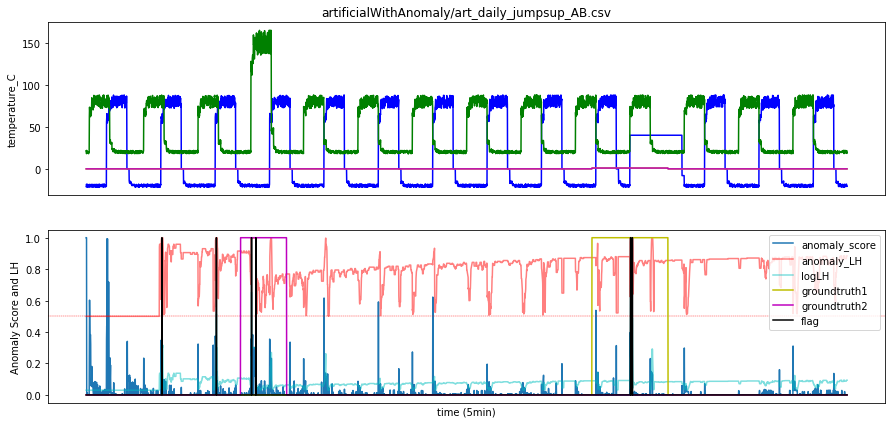

In [70]:
a = 0
b = -1

fig, ax = plt.subplots(2, sharex=True, figsize=(15,7))
ax[0].plot(df.inputVal1[a:b], color='b')
ax[0].plot(df.inputVal2[a:b], color='g')
ax[0].set(ylabel='temperature_C', title=PATH_relative)
#ax[0].vlines(idcs[a:b], 0, 1, transform=ax[0].get_xaxis_transform(), colors='y')
#ax[0].vlines(anomalies_gt, 0, 1, transform=ax[0].get_xaxis_transform(), colors='b', linestyles={'dashed'})
ax[0].plot(df.label1[a:b], color='y', label='groundtruth1')
ax[0].plot(df.label1[a:b], color='m', label='groundtruth2')


ax[1].plot(df.AnomalyScore[a:b], label='anomaly_score')
ax[1].set(ylabel='Anomaly Score and LH')
ax[1].plot(df.lh[a:b], color='r', alpha=0.5, label='anomaly_LH')
ax[1].plot(df.logLH[a:b], color='c', alpha=0.5, label='logLH')
ax[1].axhline(y=0.5, 
              color='r', linestyle='--', linewidth=0.4)
              #xmin=data.anomaly_likelihood.index[a], xmax=data.anomaly_likelihood.index[b])
#ax[1].vlines(idcs[a:b], 0, 1, transform=ax[1].get_xaxis_transform(), alpha=0.9, colors='y', label='groundtruth')
ax[1].plot(df.label1[a:b], color='y', label='groundtruth1')
ax[1].plot(df.label2[a:b], color='m', label='groundtruth2')
ax[1].plot(df.flag[a:b], color='k', label='flag')
ax[1].set(xlabel='time (5min)')
ax[1].legend(loc=1)

#set ticks every week
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [73]:
df.columns

Index([u'AnomalyScore', u'TMactiveCells', u'TMpredictedCells', u'flag',
       u'idxAS', u'inputSDR', u'inputSDRts', u'inputSDRval1', u'inputSDRval2',
       u'inputTs', u'inputVal1', u'inputVal2', u'label1', u'label2', u'lh',
       u'logLH', u'sp4tm', u'sp_active'],
      dtype='object')

In [94]:
print "Number of Anomaly according to HTM: ", sum(df.flag)
print "Number of Anomaly according to GT: ", sum(df.loc[(df['label1'] == 1) | (df['label2'] == 1), 'flag'])

Number of Anomaly according to HTM:  8
Number of Anomaly according to GT:  5


Which Sensor caused the anomaly?

In [197]:
df.loc[df['flag']==1, 'idxAS']

401     [898, 902, 904, 906, 1004, 1018, 1026, 1029, 1...
402     [227, 883, 884, 889, 890, 891, 892, 895, 896, ...
690     [883, 884, 885, 887, 889, 890, 891, 892, 893, ...
876     [190, 225, 226, 230, 231, 802, 832, 1051, 1052...
899                                                    []
2883    [199, 204, 210, 213, 217, 229, 866, 869, 870, ...
2884    [207, 225, 226, 229, 230, 231, 236, 870, 871, ...
2893                                                   []
Name: idxAS, dtype: object

In [99]:
inputTsIdx, inputVal1Idx, inputVal2Idx

([0, 809], [810, 960], [961, 1111])

In [198]:
featureImportance = []

for i in df.loc[df['flag']==1, 'idxAS'].index:
    attribution = []
    for j in df.loc[i, 'idxAS']:
        if j <= inputTsIdx[1]:
            attribution.append(0)
        if j >= inputVal1Idx[0] and j <= inputVal1Idx[1]:
            attribution.append(1)
        if j >= inputVal2Idx[0] and j <= inputVal2Idx[1]:
            attribution.append(2)    
        else:
            pass
    temp = {'idx':i, 'ts': attribution.count(0), 'val1': attribution.count(1), 'val2': attribution.count(2)}
    featureImportance.append(temp)


In [199]:
featureImportance

[{'idx': 401, 'ts': 0, 'val1': 4, 'val2': 10},
 {'idx': 402, 'ts': 1, 'val1': 11, 'val2': 8},
 {'idx': 690, 'ts': 0, 'val1': 22, 'val2': 1},
 {'idx': 876, 'ts': 6, 'val1': 1, 'val2': 34},
 {'idx': 899, 'ts': 0, 'val1': 0, 'val2': 0},
 {'idx': 2883, 'ts': 6, 'val1': 26, 'val2': 6},
 {'idx': 2884, 'ts': 7, 'val1': 26, 'val2': 0},
 {'idx': 2893, 'ts': 0, 'val1': 0, 'val2': 0}]

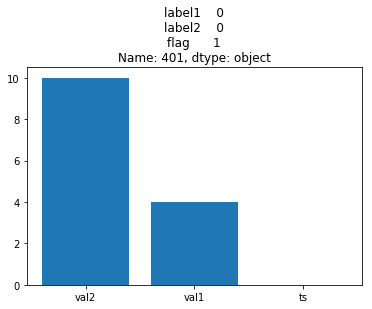

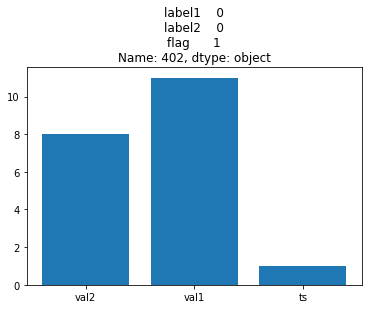

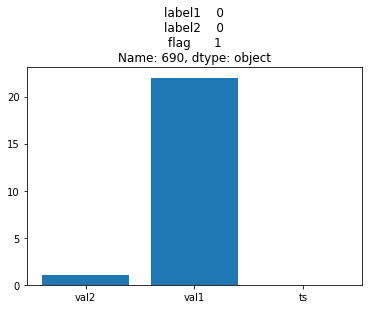

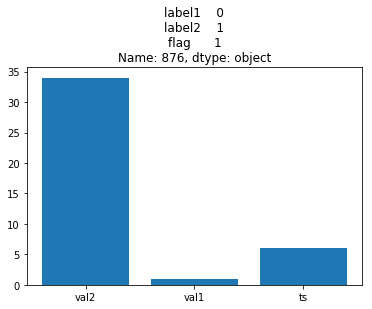

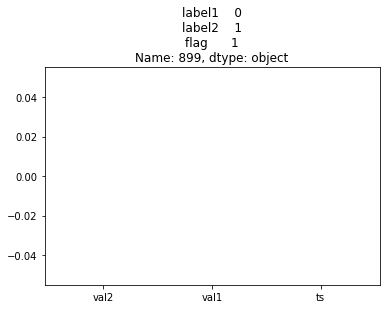

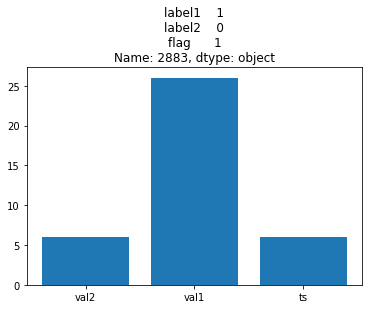

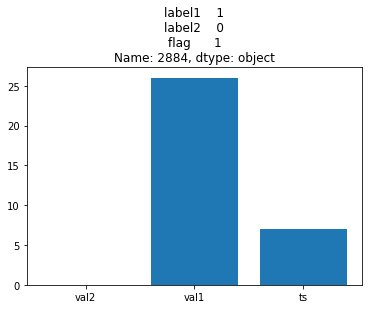

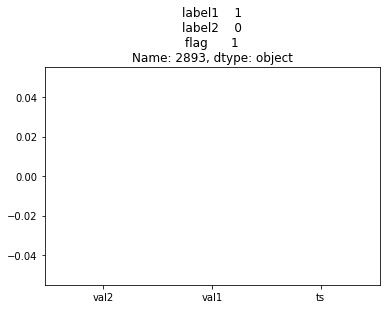

In [232]:
for i in xrange(len(featureImportance)):
    names = [k for k,v in featureImportance[i].iteritems() if k not in ('idx')]
    values = [v for k,v in featureImportance[i].iteritems() if k not in ('idx')]
    plt.figure()
    plt.bar(names, values)
    plt.title(df.loc[featureImportance[i]['idx'], ['label1', 'label2', 'flag']])

**TODOES**
Inspect 899 and 2893, why `idxAS` array is empty?

In [98]:
df.loc[899, 'idxAS']
df.loc[2893, 'idxAS']

array([], dtype=int64)

In [73]:
# import copy
# dataOut = copy.deepcopy(data)

In [74]:
# # to dump to .json we need to change array to lists and datetime to str

# for i in xrange(len(dataOut)):
#     for k,v in dataOut[i].items():
#         if isinstance(v, np.ndarray):
#             #print dataOut[i][k].tolist
#             dataOut[i][k] = dataOut[i][k].tolist()
#         if isinstance(v, datetime.datetime):
#             dataOut[i][k] = str(dataOut[i][k])
#         else:
#             pass

In [75]:
# filename = 'multi_getScal_spLearnFalse_tmLearnAll.json'
# with open(filename, 'w') as f:
#     json.dump(dataOut, f, indent=4, sort_keys=True, separators=(',', ': '))